The Perez-Rosas2018 data is in the format of one text file per record. The following code will merge the data into a single dataframe.

In [19]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt

def remove_numbers(in_str):
    return re.sub(r'[0-9]+', '', in_str)
    
def tabulate_data(dataset_name):
    """Create a Pandas dataframe out of input Perez-Rosas dataset files
    @param dataset_name: Name of the dataset (fakenews or celebrity)
    @returns Pandas dataframe with columns:
        dataset_name, news_type, news_category, news_headline, news_content
    """
    result_data_list = []
    for news_type in ['fake', 'legit']:
        folder = '%s/%s' % (dataset_name, news_type)
        for fname in os.listdir(folder):
            result_data = {}
            result_data['dataset_name'] = dataset_name
            result_data['news_type'] = news_type
            if dataset_name == 'fakeNewsDataset':
                result_data['news_category'] = remove_numbers(fname.split('.')[0])
            result_data['file_name'] = fname
            filepath = os.path.join(folder, fname)
            with open(filepath, 'r', encoding="utf8") as f:
                file_data = f.read().split('\n')
                result_data['news_headline'] = file_data[0]
                result_data['news_content'] = ' '.join(file_data[2:])
                result_data['news_all'] = ' '.join(file_data[0:])
            result_data['num_words'] = len(result_data['news_all'].split())
            result_data_list.append(result_data)
    df = pd.DataFrame(result_data_list)
    return df


Let us create dataframes for the two datasets and have a look.

In [17]:
fakenews_df = tabulate_data('fakeNewsDataset')
fakenews_df[0:5]

,dataset_name,file_name,news_all,news_category,news_content,news_headline,news_type,num_words
0,fakeNewsDataset,biz01.fake.txt,"Alex Jones Vindicated in ""Pizzagate"" Controver...",biz,"""Alex Jones, purveyor of the independent inves...","Alex Jones Vindicated in ""Pizzagate"" Controversy",fake,213
1,fakeNewsDataset,biz02.fake.txt,THE BIG DATA CONSPIRACY Government and Silico...,biz,Government and Silicon Valley are looking to e...,THE BIG DATA CONSPIRACY,fake,101
2,fakeNewsDataset,biz03.fake.txt,California Surprisingly Lenient on Auto Emissi...,biz,"Setting Up Face-Off With Trump ""California's c...",California Surprisingly Lenient on Auto Emissi...,fake,101
3,fakeNewsDataset,biz04.fake.txt,Mexicans Are Chomping at the Bit to Stop NAFTA...,biz,Mexico has been unfairly gaining from NAFTA as...,Mexicans Are Chomping at the Bit to Stop NAFTA...,fake,129
4,fakeNewsDataset,biz05.fake.txt,Breaking News: Snapchat to purchase Twitter fo...,biz,Yahoo and AOL could be extremely popular over ...,Breaking News: Snapchat to purchase Twitter fo...,fake,107


(array([ 27., 121., 159.,  88.,  45.,  17.,  18.,   0.,   4.,   1.]),
 array([ 58.,  81., 104., 127., 150., 173., 196., 219., 242., 265., 288.]),
 <a list of 10 Patch objects>)

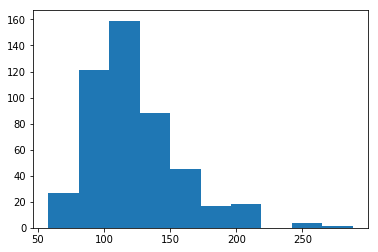

In [21]:
# View histogram of number of words in news article. We will use this to decide the max length for our LSTM
plt.hist(fakenews_df['num_words'])

In [22]:
celebrity_df = tabulate_data('celebrityDataset')
celebrity_df[0:5]

,dataset_name,file_name,news_all,news_content,news_headline,news_type,num_words
0,celebrityDataset,001fake.txt,JENNIFER ANISTON HINTS AT FRIENDS REUNION Jen...,Jennifer Aniston is making Friends fans very h...,JENNIFER ANISTON HINTS AT FRIENDS REUNION,fake,82
1,celebrityDataset,002fake.txt,Brad Pitt Texts Jennifer Aniston Nonstop: Seek...,Brad Pitt and Jennifer Aniston have reportedly...,Brad Pitt Texts Jennifer Aniston Nonstop: Seek...,fake,413
2,celebrityDataset,003fake.txt,Jennifer Aniston Pregnant With 'Miracle Baby' ...,"Jennifer Aniston, 47, has dreamed of becoming ...",Jennifer Aniston Pregnant With 'Miracle Baby' ...,fake,386
3,celebrityDataset,004fake.txt,Heartbroken Jennifer Aniston Runs For The Bord...,Jennifer Aniston is looking to adopt a baby fr...,Heartbroken Jennifer Aniston Runs For The Bord...,fake,277
4,celebrityDataset,005fake.txt,Jennifer Aniston Cheated On Brad Pitt With Mat...,"Brad Pitt, 51, may not have been the only one ...",Jennifer Aniston Cheated On Brad Pitt With Mat...,fake,329


(array([488.,   8.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   28. ,  1502.9,  2977.8,  4452.7,  5927.6,  7402.5,  8877.4,
        10352.3, 11827.2, 13302.1, 14777. ]),
 <a list of 10 Patch objects>)

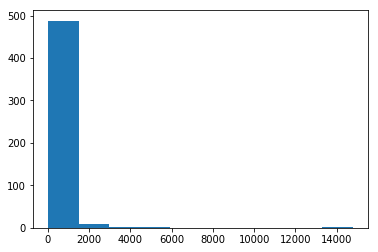

In [31]:
# View histogram of number of words in news article. We will use this to decide the max length for our LSTM
plt.hist(celebrity_df['num_words'])

In [30]:
# There is one outlier record with 14,777 words. I reviewed this and it is actually that long.
celebrity_df.iloc[celebrity_df['num_words'].idxmax()]

dataset_name                                      celebrityDataset
file_name                                             060legit.txt
news_all         Paul McCartney Is Not Dead (And Neither Is the...
news_content     This January marks the tenth anniversary of th...
news_headline    Paul McCartney Is Not Dead (And Neither Is the...
news_type                                                    legit
num_words                                                    14777
Name: 309, dtype: object

(array([134., 224.,  87.,  26.,   8.,   5.,   1.,   5.,   1.,   2.]),
 array([  28. ,  220.7,  413.4,  606.1,  798.8,  991.5, 1184.2, 1376.9,
        1569.6, 1762.3, 1955. ]),
 <a list of 10 Patch objects>)

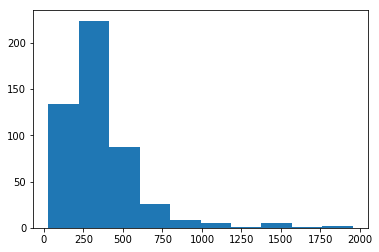

In [33]:
# The celebrity news articles are longer. We will need to consider that if we decide to use them
plt.hist(celebrity_df[celebrity_df['num_words'] < 2000]['num_words'])